# Extreme Driving Detection

Extreme turning movement detection (outliers detection)

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor as LOF
%matplotlib inline
# %matplotlib widget

In [2]:
# load the dataset
df = pd.read_csv("all_LAT_uns.csv")

#print first 10 rows and descriptive statistics
df.head(10)

,NewAccelX,NewAccelY,NewAccelZ,NewRotRateX,NewRotRateY,NewRotRateZ,locationSpeed
0,0.001,-0.002,-0.007,0.002,-0.001,0.000,0.0
1,0.007,0.000,0.011,-0.001,0.001,0.000,0.0
2,0.008,0.004,0.015,0.000,0.000,-0.001,0.0
3,0.008,0.002,0.004,0.002,-0.001,-0.001,0.0
4,0.009,0.001,0.026,-0.002,-0.001,0.002,0.0
5,0.012,-0.001,0.003,0.000,0.000,-0.001,0.0
6,0.007,0.000,0.004,-0.001,0.000,0.000,0.0
7,-0.008,-0.006,0.002,0.001,-0.001,0.000,0.0
8,-0.004,0.005,0.022,0.000,0.001,0.001,0.0
9,0.007,0.007,0.016,0.000,-0.002,0.003,0.0


In [3]:
df.describe()

,NewAccelX,NewAccelY,NewAccelZ,NewRotRateX,NewRotRateY,NewRotRateZ,locationSpeed
count,103891.000000,103891.000000,103891.000000,103891.000000,103891.000000,103891.000000,103891.000000
mean,-0.000079,0.000867,0.009910,-0.000357,-0.000180,0.000291,16.333149
std,0.058077,0.060980,0.063359,0.134682,0.128994,0.146620,12.691258
min,-1.322000,-2.163000,-1.415000,-9.102000,-12.628000,-13.615000,0.000000
25%,-0.022000,-0.022000,-0.015000,-0.013000,-0.013000,-0.010000,6.040000
50%,0.000000,0.001000,0.011000,0.000000,0.000000,0.000000,13.080000
75%,0.022000,0.024000,0.035000,0.013000,0.013000,0.010000,29.000000
max,1.224000,1.033000,1.185000,7.147000,7.212000,6.953000,47.660000


In [4]:
#create new feature 
# new single feature calculation
df['T'] = (1/9.81)*np.sqrt((df.loc[:, 'NewRotRateZ']**2)*(df.loc[:, 'locationSpeed'])**2 + (df.loc[:, 'NewAccelX']**2))
df['T'].describe()

count    103891.000000
mean          0.048497
std           0.162435
min           0.000000
25%           0.005215
50%           0.016315
75%           0.046902
max          13.287318
Name: T, dtype: float64

In [5]:
# function for visualizing results of outlier detection
def outlier_vis(var1, var2, var3, df, method):
    ''' arguments: df - the dataframe that should contain a column inicating if each row is an outlier
                    var1, var2, var3 - the variables to visualize
                    method - name of method whose outliers are visualized (column that contains the outliers label)'''
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    
    # plot normal data
    ax.scatter(df[df[method]==0][var1], df[df[method]==0][var2], df[df[method]==0][var3], color = "b", s=3)
    # plot outlier values
    ax.scatter(df[df[method]==1][var1], df[df[method]==1][var2], df[df[method]==1][var3], color = "r", s=3)
    
    ax.set_xlabel(var2)
    ax.set_ylabel(var1)
    ax.set_zlabel(var3)
    
    fig.show()
    
                

## Box plot

### Variable: T

In [108]:
q1

0.0052153712178009464

In [6]:
# Example based on variable T
q1 = df['T'].quantile(0.25)
q3 = df['T'].quantile(0.75)
iqr = q3-q1
print("IQR =",iqr)

IQR = 0.041687122944857234


Number of detected outliers: 11028


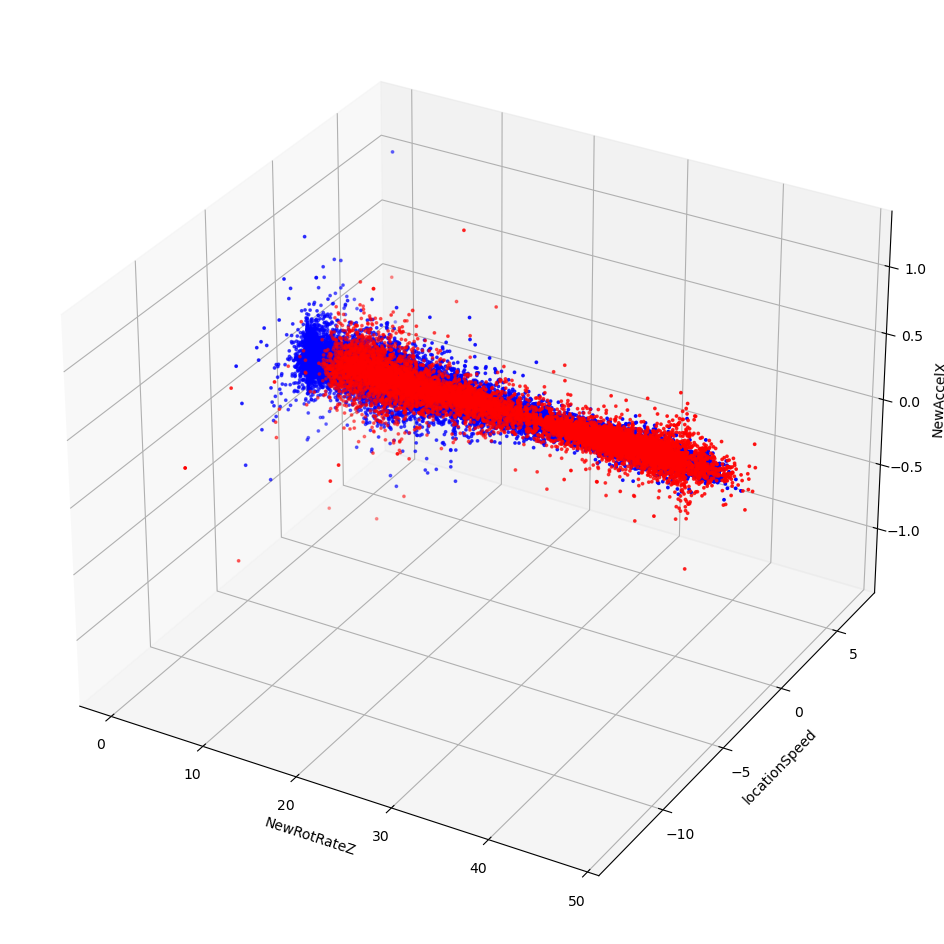

In [103]:
# create a new column with value 1 for outliers and 0 for the rest
df['bplot_T'] = ((df['T']<q1-1.5*iqr) | (df['T']>q3+1.5*iqr))

# call the function for visualizing
outlier_vis('locationSpeed', 'NewRotRateZ', 'NewAccelX', df,'bplot_T')

print("Number of detected outliers:", df['bplot_T'].sum())

## Z-score

### Variable: T

In [110]:
# calculate the Z-score for "T"
mean = df['T'].mean()
std_dev = df['T'].std()
df['Z-score_T'] = abs(df['T']-mean)/std_dev

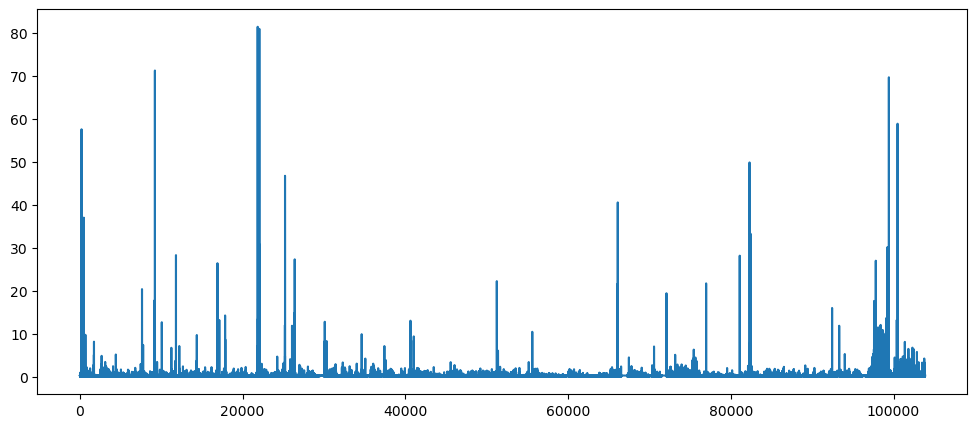

In [119]:
# plot the Z-score values in order to intuitively (visually) choose a proper threshold
fig = plt.subplots(figsize=(12, 5))
plt.plot(df['Z-score_T'])
plt.show()

In [120]:
# programmatically define a good threshold value so that 0.5% of the values are outliers

outliers_number = int(len(df) * 0.5/100)
min_distance = np.inf

for threshold in np.arange(1.5, 10, 0.25):
    # select threshold so that 0.5% are outliers
    outliers_found = (df['Z-score_T'] > threshold).sum()
    if np.abs(outliers_found - outliers_number) <= min_distance:
        min_distance = np.abs(outliers_found - outliers_number)
        outliers_detected = outliers_found
        final_threshold = threshold

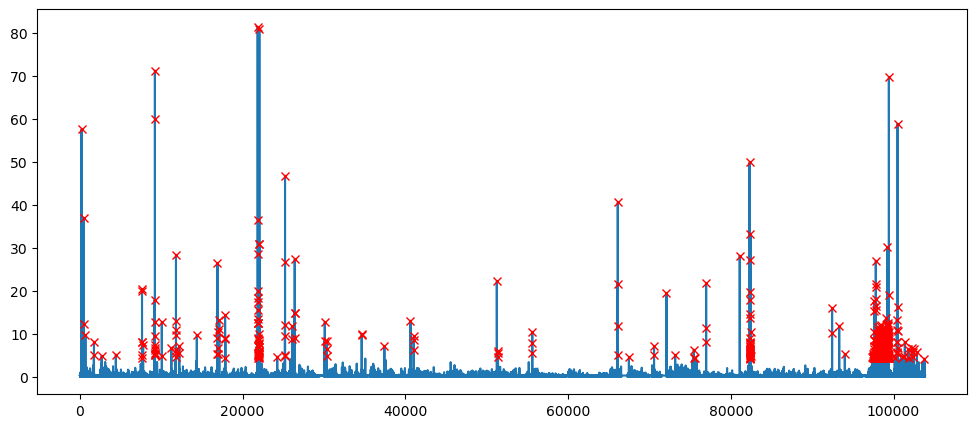

In [129]:
# plot the Z-score of T and the detected outliers

fig = plt.subplots(figsize=(12, 5))
plt.plot(df['Z-score_T'])
outliers_idxs = df[df['zscore_T'] == True].index
plt.plot(outliers_idxs, df.loc[outliers_idxs, 'Z-score_T'], "x", color='red')
plt.show()


Number of detected outliers: 514


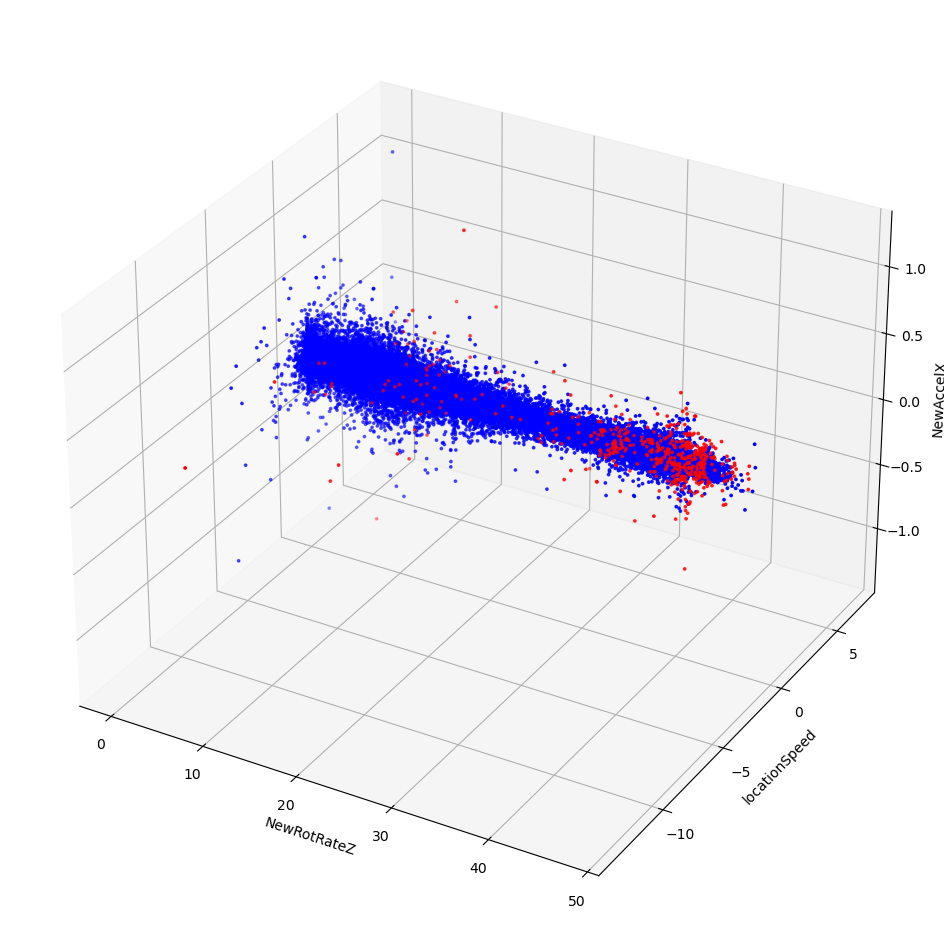

In [121]:

# create a new column with value 1 for outliers and 0 for the rest
df['zscore_T'] = df['Z-score_T'] > final_threshold

# call the function for visualizing
outlier_vis('locationSpeed', 'NewRotRateZ', 'NewAccelX', df,'zscore_T') 

print("Number of detected outliers:", df['zscore_T'].sum())


## kNN

In [175]:
# instantiate model
knn = NearestNeighbors(n_neighbors = 3)
# fit model
x = df[['NewAccelX','NewRotRateZ', 'locationSpeed', 'T']] # use only relevant columns
knn.fit(x)

# get distances
dist, _ = knn.kneighbors(x)

# save mean value of distances in df
df['mean_dist_knn'] = dist.mean(axis=1)

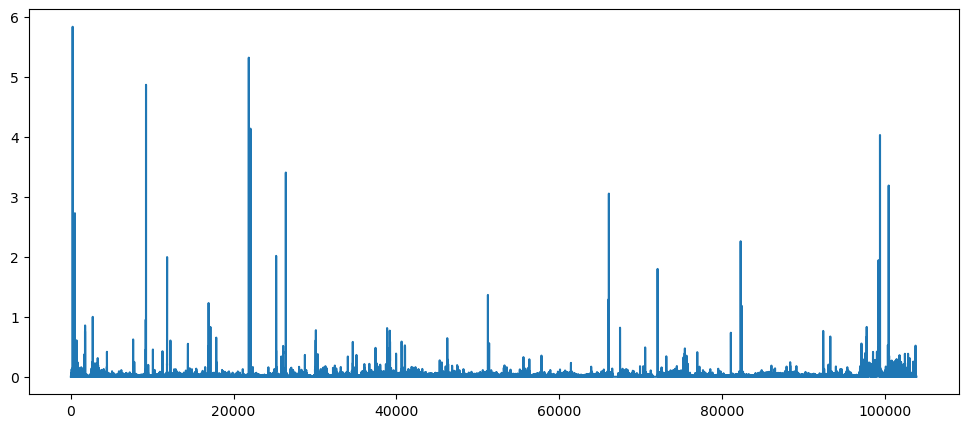

In [176]:
# plot in order to visually choose a threshold
fig = plt.subplots(figsize=(12, 5))
plt.plot(df['mean_dist_knn'])
plt.show()

In [177]:
# programmatically define a good threshold value so that 0.5% of the values are outliers

outliers_number = int(len(df) * 0.5/100)
min_distance = np.inf

for threshold in np.arange(0, 0.2, 0.0001):
    # select threshold so that 0.5% are outliers
    outliers_found = (df['mean_dist_knn'] > threshold).sum()
    if np.abs(outliers_found - outliers_number) <= min_distance:
        min_distance = np.abs(outliers_found - outliers_number)
        outliers_detected = outliers_found
        final_threshold = threshold

In [187]:
final_threshold

0.14700000000000002

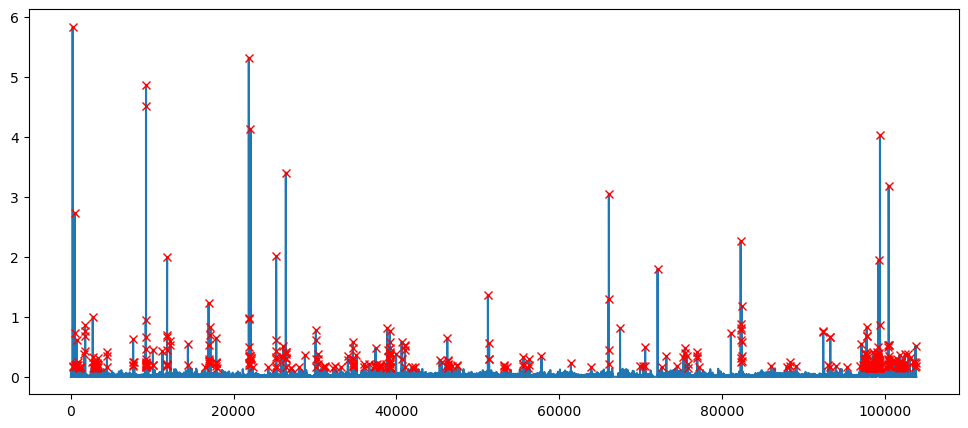

Number of detected outliers: 518


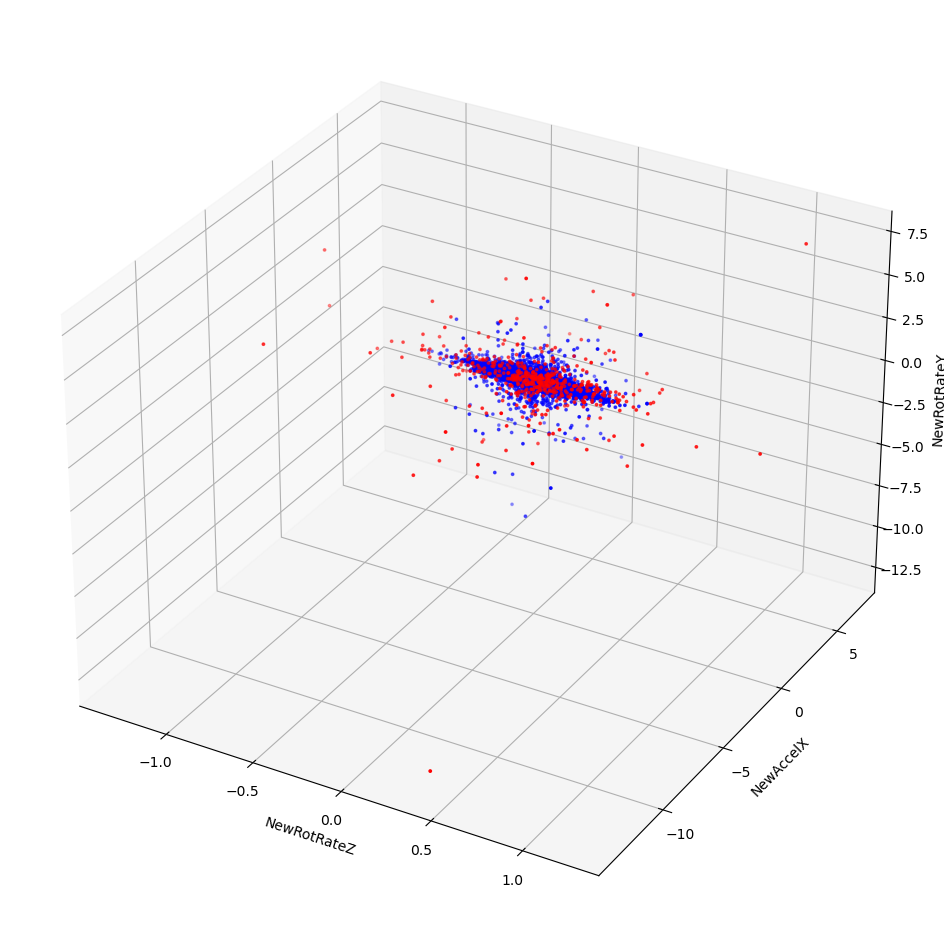

In [188]:
# create a new column with value 1 for outliers and 0 for the rest
df['knn'] = df['mean_dist_knn'] > final_threshold

# plot the detected outliers
fig = plt.subplots(figsize=(12, 5))
plt.plot(df['mean_dist_knn'])
outliers_idxs = df[df['knn'] == True].index
plt.plot(outliers_idxs, df.loc[outliers_idxs, 'mean_dist_knn'], "x", color='red')
plt.show()

# call the function for visualizing
outlier_vis('NewAccelX','NewRotRateZ', 'NewRotRateY', df,'knn')

print("Number of detected outliers:", df['knn'].sum())

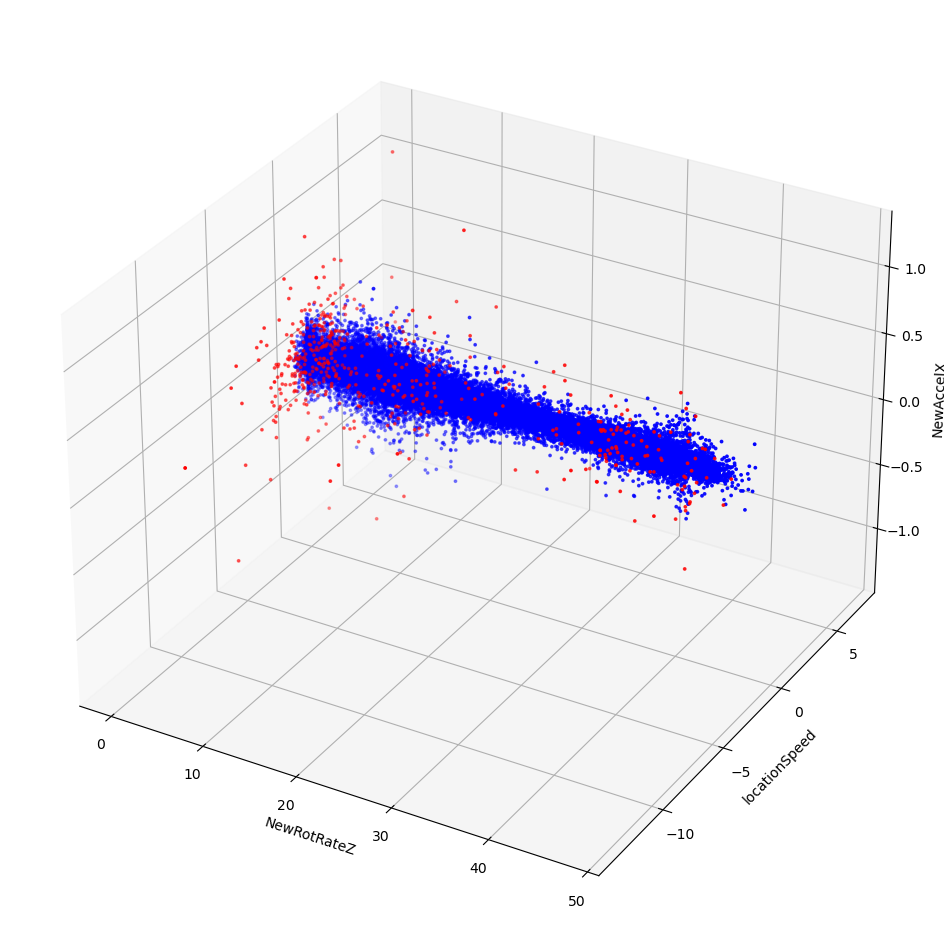

In [147]:
outlier_vis('locationSpeed','NewRotRateZ', 'NewAccelX', df,'knn')

## Local Outlier Factor (LOF)

In [189]:
df.head()

,NewAccelX,NewAccelY,NewAccelZ,NewRotRateX,NewRotRateY,NewRotRateZ,locationSpeed,T,bplot_T,Z-score_T,zscore_T,mean_dist_knn,knn,lof,isol_forest,time_series_peaks_T
0,0.001,-0.002,-0.007,0.002,-0.001,0.000,0.0,0.000102,False,0.297934,False,0.0,False,False,False,False
1,0.007,0.000,0.011,-0.001,0.001,0.000,0.0,0.000714,False,0.294169,False,0.0,False,False,False,False
2,0.008,0.004,0.015,0.000,0.000,-0.001,0.0,0.000815,False,0.293541,False,0.0,False,False,False,False
3,0.008,0.002,0.004,0.002,-0.001,-0.001,0.0,0.000815,False,0.293541,False,0.0,False,False,False,False
4,0.009,0.001,0.026,-0.002,-0.001,0.002,0.0,0.000917,False,0.292913,False,0.0,False,False,False,False


In [190]:
x

,NewAccelX,NewRotRateZ,locationSpeed,T
0,0.001,0.000,0.0,0.000102
1,0.007,0.000,0.0,0.000714
2,0.008,-0.001,0.0,0.000815
3,0.008,-0.001,0.0,0.000815
4,0.009,0.002,0.0,0.000917
...,...,...,...,...
103886,0.009,0.004,0.0,0.000917
103887,-0.014,-0.001,0.0,0.001427
103888,-0.005,0.001,0.0,0.000510
103889,0.022,0.003,0.0,0.002243


In [191]:
# again assume about 0.5% of the dataset records to be outliers
min_distance = np.inf

for neighbors in range(2, 20):
    # select neighbors so that about 0.5% are outliers

    # instantiate model
    lof = LOF(n_neighbors=neighbors)

    # fit model and detect outliers (LOF library returns -1 for outliers and 1 for other data)
    lof_outliers = lof.fit_predict(x)

    # similarly to the other methods, we convert to 1 for outliers and 0 for the rest of the data
    outliers_found = (lof_outliers == -1).sum()

    if np.abs(outliers_found - outliers_number) <= min_distance:
        min_distance = np.abs(outliers_found - outliers_number)
        outliers_detected = outliers_found
        final_neighbors = neighbors

    

lof = LOF(n_neighbors=final_neighbors)
lof_outliers = lof.fit_predict(x)
df['lof'] = (lof_outliers==-1)

In [192]:
final_neighbors

7

Number of detected outliers: 3565


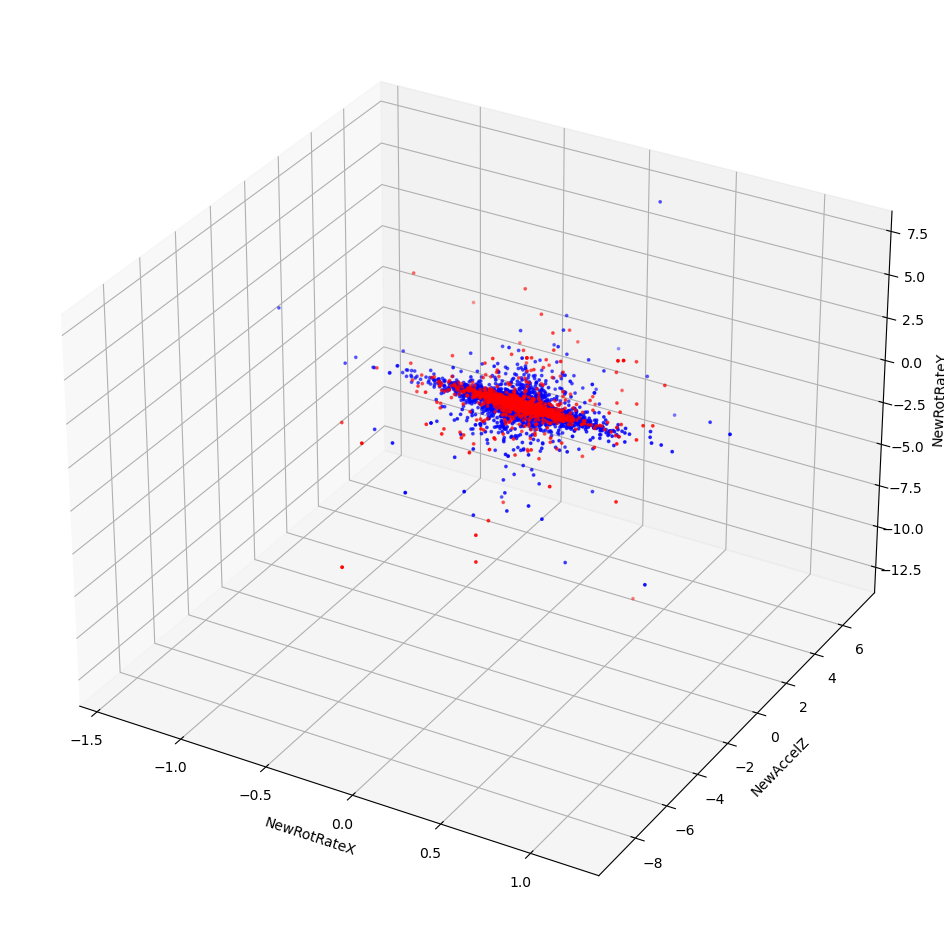

In [193]:
# call the function for visualizing
outlier_vis('NewAccelZ','NewRotRateX', 'NewRotRateY', df,'lof')

print("Number of detected outliers:", df['lof'].sum())

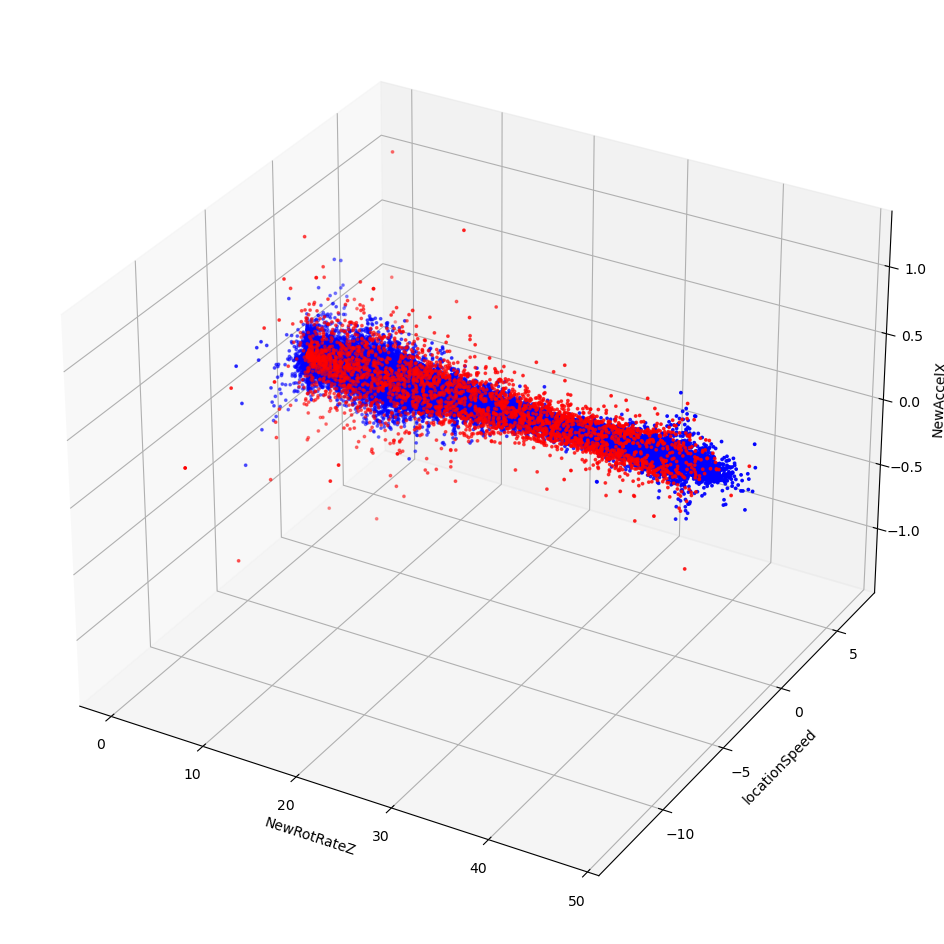

In [194]:
outlier_vis('locationSpeed','NewRotRateZ', 'NewAccelX', df,'lof')

## Isolation Forest

In [195]:
from sklearn.ensemble import IsolationForest

# again assume about 0.5% of the dataset records to be outliers
min_distance = np.inf

for contamination in np.arange(0.0025, 0.5, 0.0025):
    # select contamination so that about 0.5% are outliers

    # instantiate model
    isol_forest = IsolationForest(n_estimators=100, contamination=contamination)

    # fit model and detect outliers (isolation forest returns -1 for outliers and 1 for other data)
    isolation_forest_outliers = isol_forest.fit_predict(x.to_numpy())

    # similarly to the other methods, we convert to 1 for outliers and 0 for the rest of the data
    outliers_found = (isolation_forest_outliers == -1).sum()

    if np.abs(outliers_found - outliers_number) <= min_distance:
        min_distance = np.abs(outliers_found - outliers_number)
        outliers_detected = outliers_found
        final_outliers = (isolation_forest_outliers == -1)
        final_contamination = contamination
    else:
        # since we traverse the contamination values sequentially from smaller to larger, we are increasing
        # the number of outliers in every iteration. Initially the distance is getting lower, until a point
        # where outliers increase over the 0.5% of the dataset records and we can exit the loop early for
        # better computational performance, skipping some iterations
        break

In [196]:
final_contamination

0.005

Number of detected outliers: 520


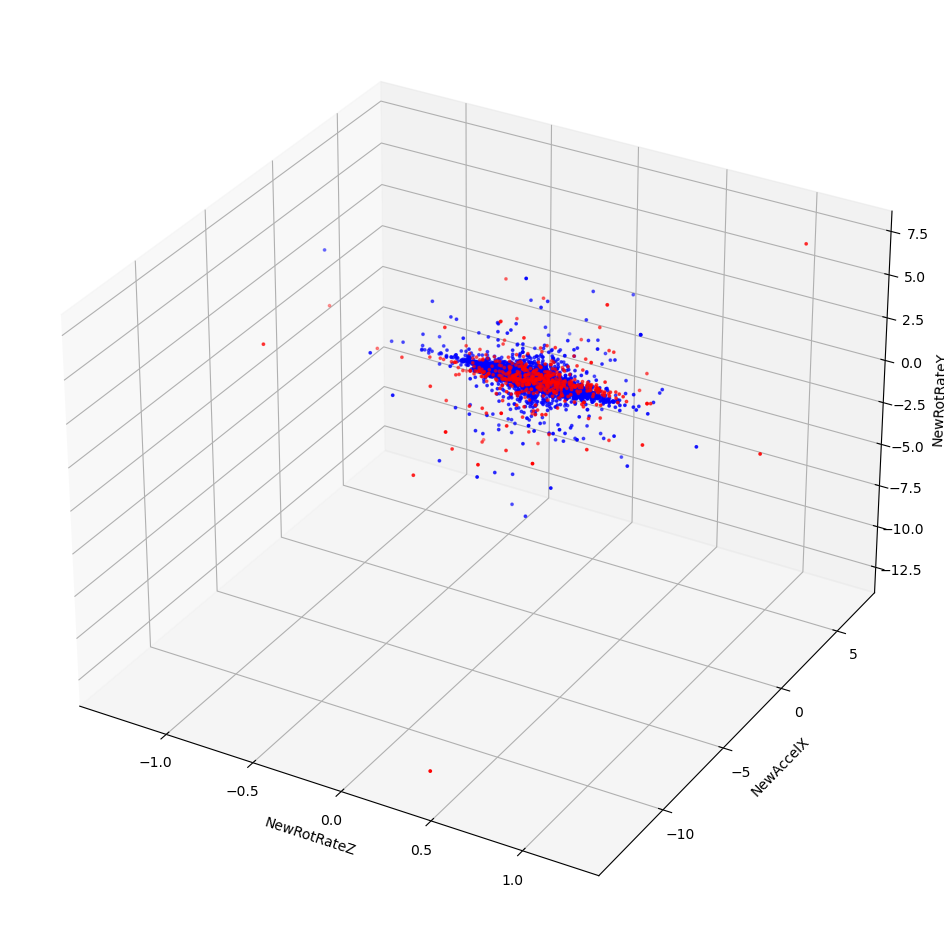

In [197]:
# create a new column with value 1 for outliers and 0 for the rest
df['isol_forest'] = final_outliers

# call the function for visualizing
outlier_vis('NewAccelX','NewRotRateZ', 'NewRotRateY', df, 'isol_forest')

print("Number of detected outliers:", df['isol_forest'].sum())

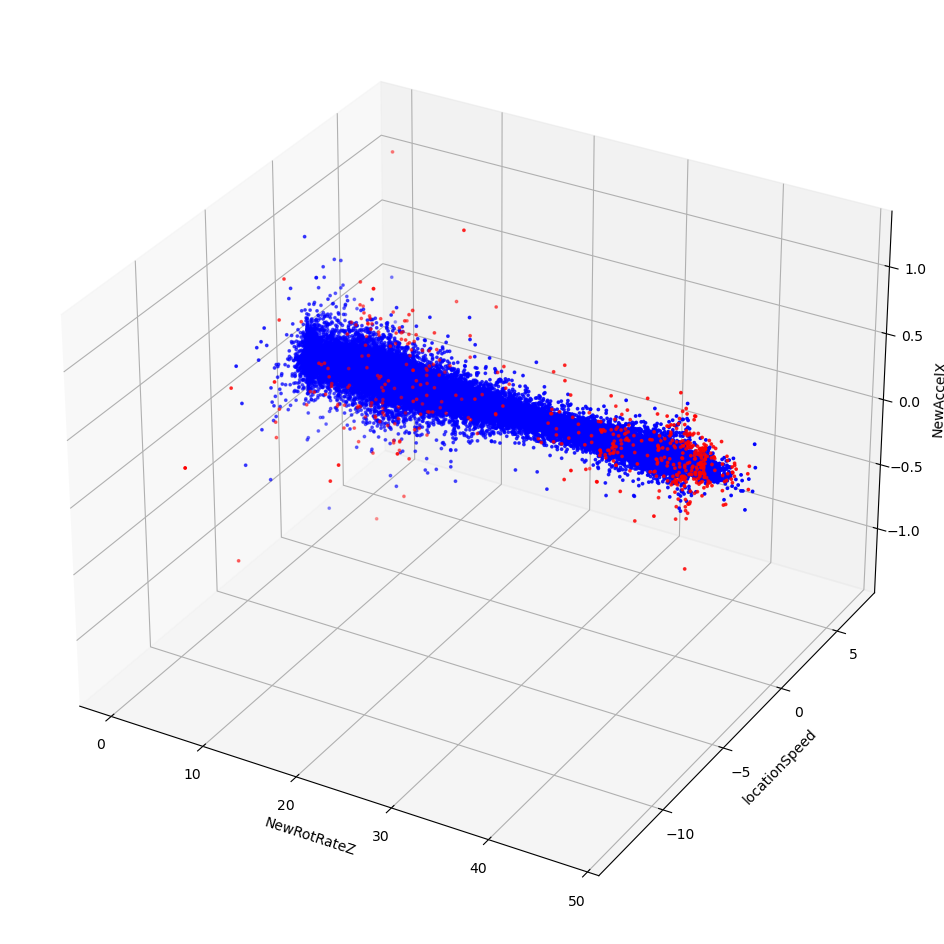

In [198]:
outlier_vis('locationSpeed','NewRotRateZ', 'NewAccelX', df, 'isol_forest')



## Time series

### Variable: T

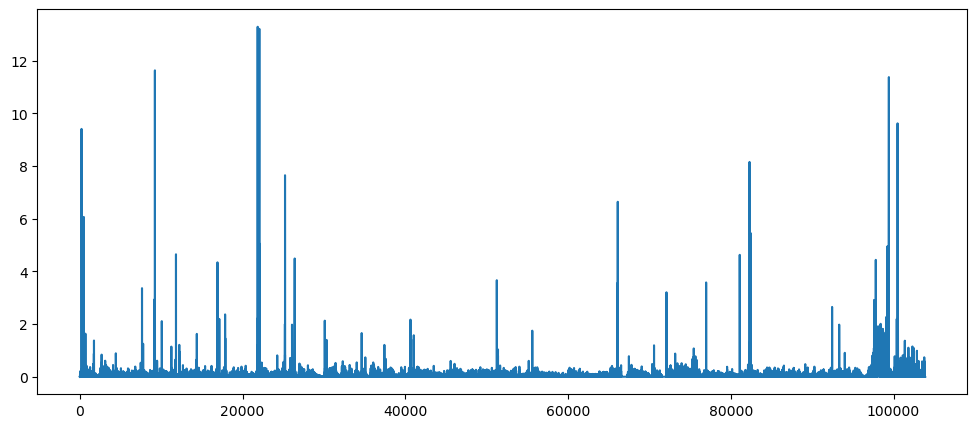

In [199]:
# visualize time-series for the selected variable

fig = plt.subplots(figsize=(12, 5))
plt.plot(df['T'])
plt.show()

In [200]:
from scipy.signal import find_peaks


# again assume about 0.5% of the dataset records to be outliers
min_distance = np.inf

for height in np.arange(0.05, 10, 0.05):
    # select height over which peak classified as outlier

    peaks_idxs, _ = find_peaks(df['T'], height=height, distance=20)  # arbitrary distance between neighboring peaks 

    # similarly to the other methods, we convert to 1 for outliers and 0 for the rest of the data
    outliers_found = len(peaks_idxs)

    if np.abs(outliers_found - outliers_number) <= min_distance:
        min_distance = np.abs(outliers_found - outliers_number)
        outliers_detected = outliers_found
        final_peaks_idxs = peaks_idxs
        final_outliers = df.index.isin(peaks_idxs)
        final_height = height
    else:
        # since we traverse the height values sequentially from smaller to larger, we are increasing
        # the number of outliers in every iteration. Initially the distance is getting lower, until a point
        # where outliers increase over the 0.5% of the dataset records and we can exit the loop early for
        # better computational performance, skipping some iterations
        break

In [202]:
final_height

0.25

Number of detected outliers: 565


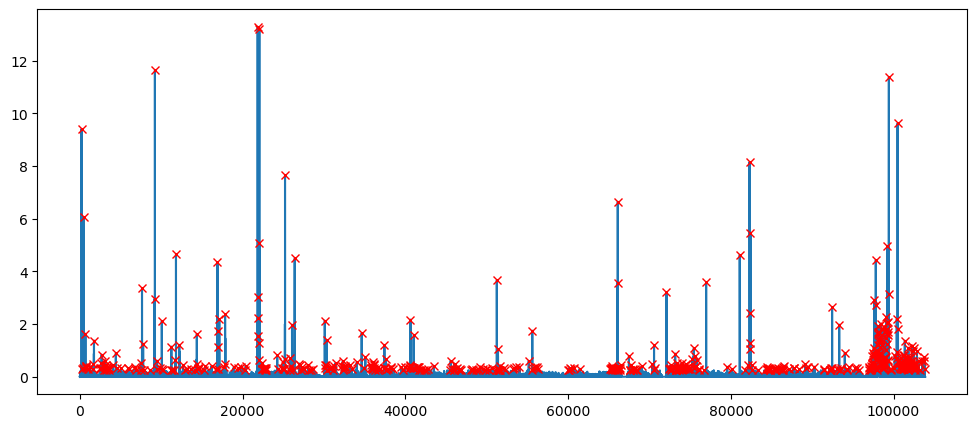

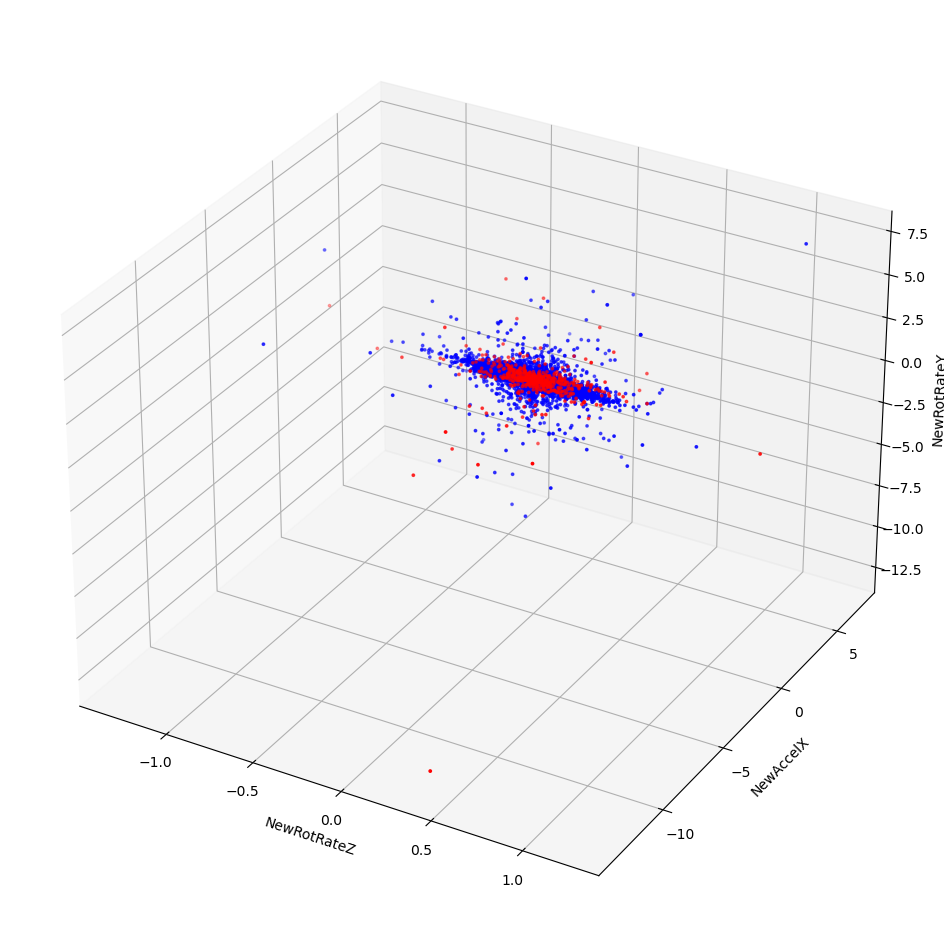

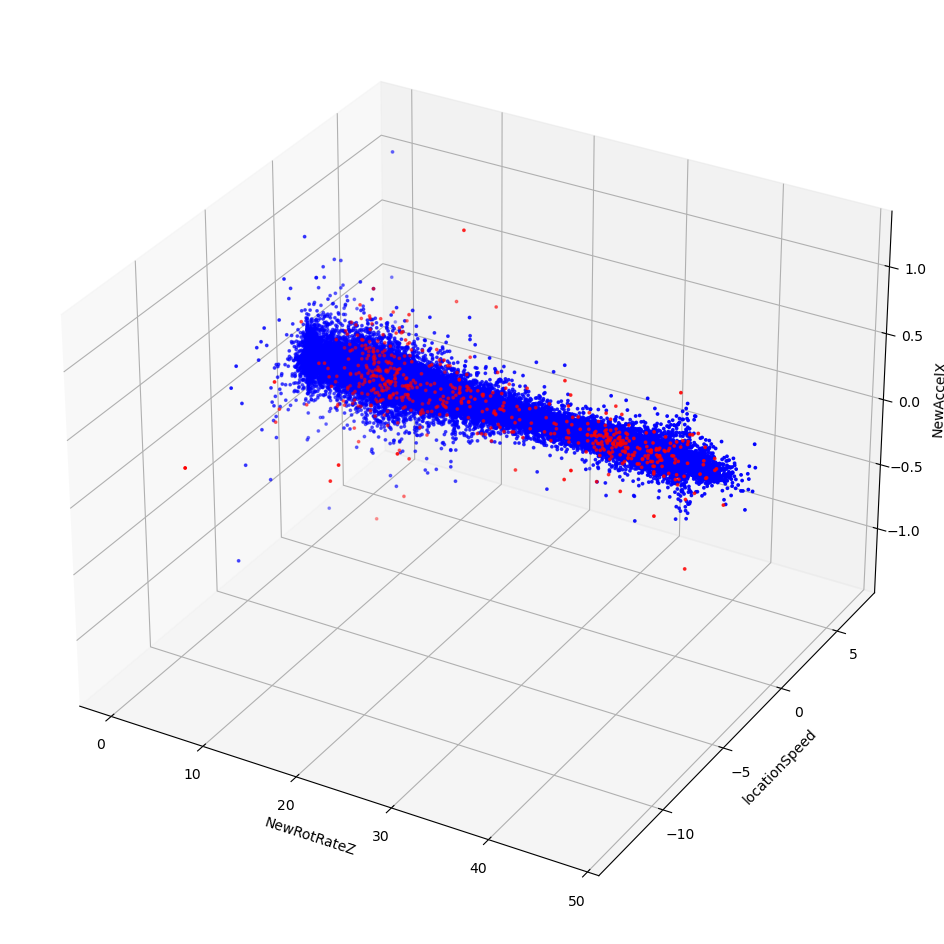

In [201]:
# create a new column with value 1 for outliers and 0 for the rest
df['time_series_peaks_T'] = final_outliers

print("Number of detected outliers:", df['time_series_peaks_T'].sum())

fig = plt.subplots(figsize=(12, 5))
plt.plot(df['T'])
plt.plot(final_peaks_idxs, df.loc[final_peaks_idxs, 'T'], "x", color='red')
plt.show()

# call the function for visualizing
outlier_vis('NewAccelX','NewRotRateZ', 'NewRotRateY', df, 'time_series_peaks_T')
outlier_vis('locationSpeed','NewRotRateZ', 'NewAccelX', df, 'time_series_peaks_T')



# Summarize & compare findings

In [203]:
df

,NewAccelX,NewAccelY,NewAccelZ,NewRotRateX,NewRotRateY,NewRotRateZ,locationSpeed,T,bplot_T,Z-score_T,zscore_T,mean_dist_knn,knn,lof,isol_forest,time_series_peaks_T
0,0.001,-0.002,-0.007,0.002,-0.001,0.000,0.0,0.000102,False,0.297934,False,0.0,False,False,False,False
1,0.007,0.000,0.011,-0.001,0.001,0.000,0.0,0.000714,False,0.294169,False,0.0,False,False,False,False
2,0.008,0.004,0.015,0.000,0.000,-0.001,0.0,0.000815,False,0.293541,False,0.0,False,False,False,False
3,0.008,0.002,0.004,0.002,-0.001,-0.001,0.0,0.000815,False,0.293541,False,0.0,False,False,False,False
4,0.009,0.001,0.026,-0.002,-0.001,0.002,0.0,0.000917,False,0.292913,False,0.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103886,0.009,-0.001,-0.018,-0.022,0.011,0.004,0.0,0.000917,False,0.292913,False,0.0,False,True,False,False
103887,-0.014,-0.067,-0.021,0.058,-0.048,-0.001,0.0,0.001427,False,0.289776,False,0.0,False,False,False,False
103888,-0.005,0.022,-0.006,-0.003,0.022,0.001,0.0,0.000510,False,0.295424,False,0.0,False,False,False,False
103889,0.022,-0.009,-0.003,-0.008,-0.006,0.003,0.0,0.002243,False,0.284755,False,0.0,False,False,False,False


In [204]:
columns_map = {
    'Box Plot, T': 'bplot_T',
    'Z-score, T': 'zscore_T',
    'kNN': 'knn',
    'LOF': 'lof',
    'Isolation Forest': 'isol_forest',
    'Time series, T': 'time_series_peaks_T',
}

In [205]:
df_preds = pd.DataFrame()
for k, v in columns_map.items():
    df_preds[k] = df[v]


In [206]:
df_preds

,"Box Plot, T","Z-score, T",kNN,LOF,Isolation Forest,"Time series, T"
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
103886,False,False,False,True,False,False
103887,False,False,False,False,False,False
103888,False,False,False,False,False,False
103889,False,False,False,False,False,False


In [207]:
print('Outliers Detected: ')
for k, v in columns_map.items():
    print(k, ':', df_preds[k].sum())

Outliers Detected: 
Box Plot, T : 11028
Z-score, T : 514
kNN : 518
LOF : 3565
Isolation Forest : 520
Time series, T : 565


In [208]:
# we will now get the outliers that have been identified by each pair of methods
cols = df_preds.columns
target_dim = len(cols)

overlap = np.empty((target_dim, target_dim))

for i, column1 in enumerate(cols):
    for j, column2 in enumerate(cols):
        overlap[i, j] = (df_preds[column1] & df_preds[column2] ).sum()

df_overlap = pd.DataFrame(
    overlap,
    columns = cols,
    index = cols,
    dtype=int
)

df_overlap

,"Box Plot, T","Z-score, T",kNN,LOF,Isolation Forest,"Time series, T"
"Box Plot, T",11028,514,457,1142,517,565
"Z-score, T",514,514,280,138,407,116
kNN,457,280,518,307,320,158
LOF,1142,138,307,3565,188,199
Isolation Forest,517,407,320,188,520,154
"Time series, T",565,116,158,199,154,565


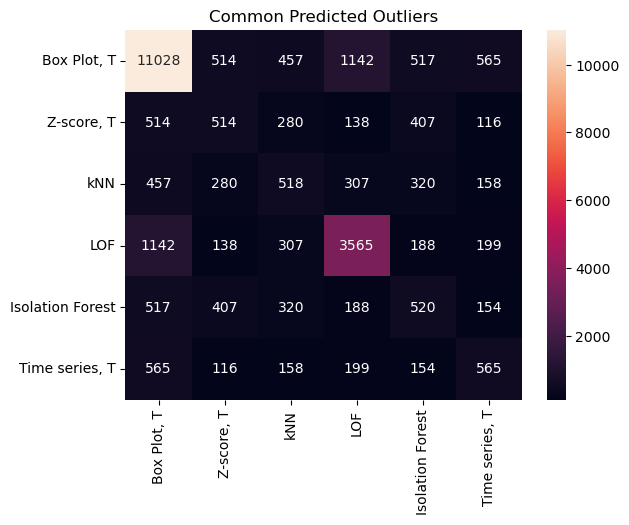

In [218]:
import seaborn as sns

# show heatmap of overlapping outliers detected by each method
ax = sns.heatmap(df_overlap, annot=True, fmt='d')
ax.set_title('Common Predicted Outliers')
plt.show()

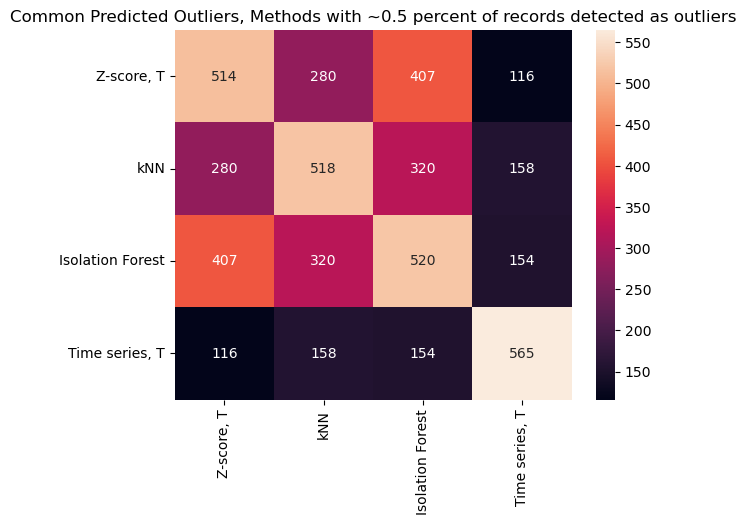

In [219]:
# next keep only the methods that yielded approximately 0.5% of the dataset records as outliers
df_overlap_2 = df_overlap.copy().drop(['Box Plot, T', 'LOF'], axis=0)\
                                .drop(['Box Plot, T', 'LOF'], axis=1)

# show heatmap of overlapping outliers detected by each method
ax = sns.heatmap(df_overlap_2, annot=True, fmt='d')
ax.set_title('Common Predicted Outliers, Methods with ~0.5 percent of records detected as outliers')
plt.show()

In [220]:
# add horizontally the numbers not taking into account the score with itself
# a way to assess some confidence that the predicted values of an algorithm is true positives
for i in range(len(df_overlap_2)):
    print(df_overlap_2.iloc[i].sum() - df_overlap_2.iloc[i, i])

803
758
881
428


In [212]:
df

,NewAccelX,NewAccelY,NewAccelZ,NewRotRateX,NewRotRateY,NewRotRateZ,locationSpeed,T,bplot_T,Z-score_T,zscore_T,mean_dist_knn,knn,lof,isol_forest,time_series_peaks_T
0,0.001,-0.002,-0.007,0.002,-0.001,0.000,0.0,0.000102,False,0.297934,False,0.0,False,False,False,False
1,0.007,0.000,0.011,-0.001,0.001,0.000,0.0,0.000714,False,0.294169,False,0.0,False,False,False,False
2,0.008,0.004,0.015,0.000,0.000,-0.001,0.0,0.000815,False,0.293541,False,0.0,False,False,False,False
3,0.008,0.002,0.004,0.002,-0.001,-0.001,0.0,0.000815,False,0.293541,False,0.0,False,False,False,False
4,0.009,0.001,0.026,-0.002,-0.001,0.002,0.0,0.000917,False,0.292913,False,0.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103886,0.009,-0.001,-0.018,-0.022,0.011,0.004,0.0,0.000917,False,0.292913,False,0.0,False,True,False,False
103887,-0.014,-0.067,-0.021,0.058,-0.048,-0.001,0.0,0.001427,False,0.289776,False,0.0,False,False,False,False
103888,-0.005,0.022,-0.006,-0.003,0.022,0.001,0.0,0.000510,False,0.295424,False,0.0,False,False,False,False
103889,0.022,-0.009,-0.003,-0.008,-0.006,0.003,0.0,0.002243,False,0.284755,False,0.0,False,False,False,False


Finally, we will take a majority vote from 3 methods.

In [213]:
df[((df['zscore_T']) & (df['isol_forest']) & (df['knn']))]

,NewAccelX,NewAccelY,NewAccelZ,NewRotRateX,NewRotRateY,NewRotRateZ,locationSpeed,T,bplot_T,Z-score_T,zscore_T,mean_dist_knn,knn,lof,isol_forest,time_series_peaks_T
219,0.387,1.033,0.420,2.796,-12.628,-13.615,6.78,9.409838,True,57.631139,True,5.834505,True,True,True,True
497,0.374,-2.163,0.409,0.854,-0.908,3.835,15.52,6.067317,True,37.053604,True,2.726299,True,True,True,True
502,0.023,0.016,-0.035,0.143,0.319,3.476,5.74,2.033869,True,12.222527,True,0.735156,True,True,True,False
697,0.252,-0.434,-0.338,0.001,0.320,-0.710,22.60,1.635880,True,9.772389,True,0.607019,True,True,True,True
1741,0.017,0.100,0.044,0.471,-0.365,-1.697,5.08,0.878774,True,5.111429,True,0.431217,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101824,0.301,0.053,0.154,0.576,-0.201,-0.373,29.02,1.103837,True,6.496982,True,0.360490,True,True,True,True
102320,-0.172,-0.044,0.195,-0.142,0.662,0.305,36.99,1.150180,True,6.782278,True,0.212077,True,True,True,True
102428,0.188,-0.049,-0.007,0.281,-0.525,-0.253,37.61,0.970152,True,5.673974,True,0.175516,True,True,True,True
102487,0.397,-0.333,-0.132,-0.223,-0.081,-0.376,28.41,1.089657,True,6.409684,True,0.383546,True,True,True,True


In [223]:
# number of outliers identified by majority vote from 3 methods, Z-score, kNN and Isolation forest
((df['zscore_T'].astype(int) + df['isol_forest'].astype(int) + df['knn'].astype(int)) >= 2).sum()

501

In [215]:
df[(df['zscore_T'].astype(int) + df['isol_forest'].astype(int) + df['knn'].astype(int)) >= 2]

,NewAccelX,NewAccelY,NewAccelZ,NewRotRateX,NewRotRateY,NewRotRateZ,locationSpeed,T,bplot_T,Z-score_T,zscore_T,mean_dist_knn,knn,lof,isol_forest,time_series_peaks_T
219,0.387,1.033,0.420,2.796,-12.628,-13.615,6.78,9.409838,True,57.631139,True,5.834505,True,True,True,True
257,0.266,0.145,0.088,-0.030,0.004,0.791,3.80,0.307599,True,1.595108,False,0.162256,True,True,True,True
497,0.374,-2.163,0.409,0.854,-0.908,3.835,15.52,6.067317,True,37.053604,True,2.726299,True,True,True,True
502,0.023,0.016,-0.035,0.143,0.319,3.476,5.74,2.033869,True,12.222527,True,0.735156,True,True,True,False
697,0.252,-0.434,-0.338,0.001,0.320,-0.710,22.60,1.635880,True,9.772389,True,0.607019,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102874,0.021,-0.123,0.012,0.232,0.680,0.526,18.42,0.987660,True,5.781760,True,0.383725,True,True,True,True
103073,0.383,0.009,-0.059,0.476,-0.005,-0.510,11.56,0.602245,True,3.409036,False,0.309777,True,True,True,True
103516,-0.186,0.653,0.510,-0.969,-0.180,0.604,9.48,0.583990,True,3.296650,False,0.253167,True,True,True,True
103774,-0.045,-0.192,0.094,1.187,-0.388,-0.635,11.42,0.739229,True,4.252349,True,0.250579,True,True,False,True


In [227]:
df[(df['zscore_T'].astype(int) + df['isol_forest'].astype(int) + df['knn'].astype(int)) >= 2].index

Int64Index([   219,    257,    497,    502,    697,    792,    825,   1664,
              1733,   1739,
            ...
            102229, 102320, 102409, 102428, 102487, 102874, 103073, 103516,
            103774, 103796],
           dtype='int64', length=501)

In [224]:
# Number of outliers that the three methods coincide (all the three at the same time, not majority vote)
((df['zscore_T']) & (df['isol_forest']) & (df['knn'])).sum()


253

In [260]:
# create dataframe with the outliers majority voting predictions
# use 1 for outliers and 0 for no outliers

outliers_identified_idxs = df[(df['zscore_T'].astype(int) + df['isol_forest'].astype(int) + df['knn'].astype(int)) >= 2].index

df_major_voting_preds = pd.DataFrame(index=df.index, columns=['outlier'], data=[False]*df.index).reset_index()
df_major_voting_preds.loc[outliers_identified_idxs, 'outlier'] = 1
df_major_voting_preds['outlier'].astype(bool)
df_major_voting_preds

,index,outlier
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
103886,103886,0
103887,103887,0
103888,103888,0
103889,103889,0


Number of detected outliers: 501


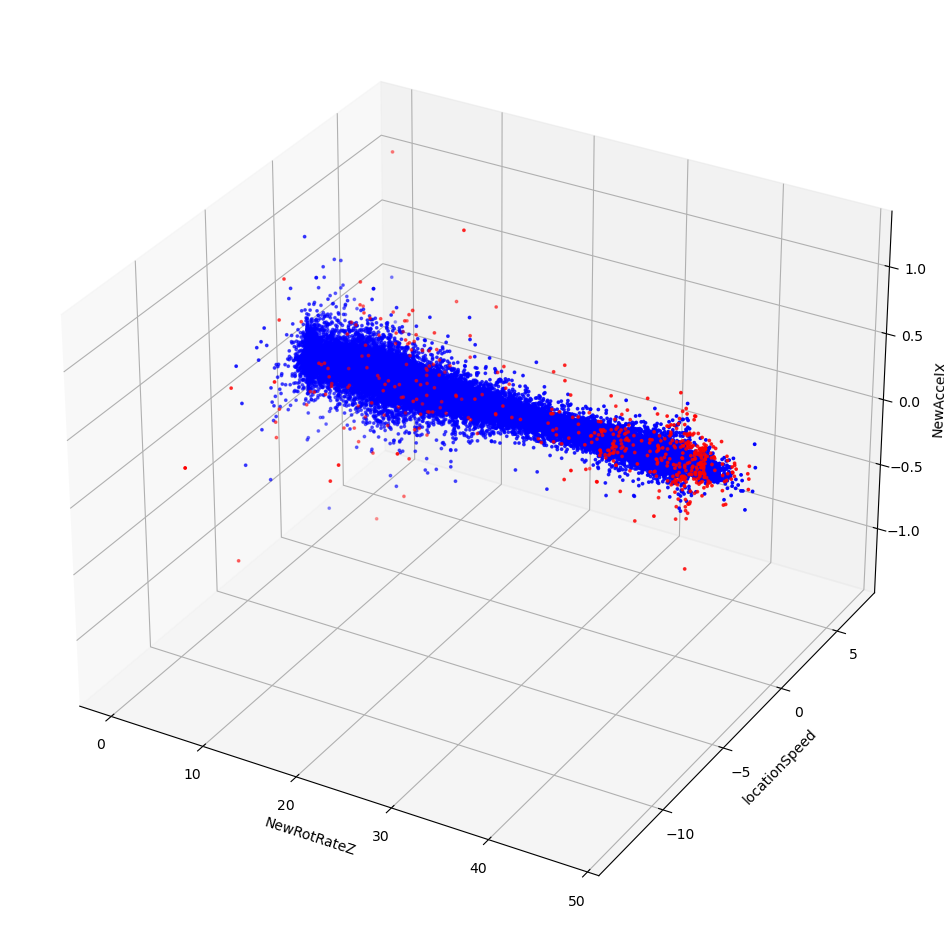

In [269]:
# plot the 3D outliers for the majority voting case

df['majority_vote'] = df_major_voting_preds['outlier']

# call the function for visualizing
outlier_vis('locationSpeed', 'NewRotRateZ', 'NewAccelX', df,'majority_vote') 

print("Number of detected outliers:", df['majority_vote'].sum())


# Results export

In [268]:
df_major_voting_preds.to_csv('predictions.csv', index=False, sep=',')